In [1]:
# hide
# no_test
![ -e /content ] && pip install -Uqq geowrangler

In [2]:
# hide
# no_test
!mkdir -p ../data
![ -e /content ] && ln -s ../data .

In [3]:
# hide
# no_test
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Geometry Validation Tutorial

> A basic introduction to using geometry validation

## Basic Usage
Loading a geojson with invalid geometries

In [4]:
# hide
# no_test
!mkdir -p ../data
![ ! -e ../data/broken.geojson ] && curl -s -o ../data/broken.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/broken.geojson

In [5]:
import geopandas as gpd
import pandas as pd

gdf = gpd.read_file("../data/broken.geojson")
gdf = pd.concat([gdf, gpd.GeoDataFrame({"geometry": [None], "id": "null geometry"})])
gdf

/home/jt/.cache/pypoetry/virtualenvs/geowrangler-U9oiUrW5-py3.9/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


,id,geometry
0,valid,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 0...."
1,out_of_crs_bounds,"POLYGON ((200.00000 0.00000, 0.00000 1.00000, ..."
2,misoriented,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1...."
3,self_intersecting,"POLYGON ((0.00000 0.00000, 1.00000 1.00000, 2...."
4,counterclockwise,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
5,sliver,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 0...."
6,holes,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
7,non-closed polygon,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
8,multipolygon,"MULTIPOLYGON (((0.00000 0.00000, 1.00000 0.000..."
9,polygon z,"POLYGON Z ((0.00000 0.00000 1.00000, 1.00000 0..."


We then run Geometry Validation. By default, these append a new column if the validation fails, applies a fix if possible, and raises a warning if no fix is available. 

In [6]:
from geowrangler.validation import GeometryValidation

GeometryValidation(gdf)

validated_gdf = GeometryValidation(gdf).validate_all()
validated_gdf

/home/jt/repos/geowrangler/geowrangler/validation.py:107: UserWarning: Found null geometries
  warnings.warn(self.warning_message)
/home/jt/repos/geowrangler/geowrangler/validation.py:107: UserWarning: Found geometries out of bounds from crs
  warnings.warn(self.warning_message)
/home/jt/repos/geowrangler/geowrangler/validation.py:107: UserWarning: Found geometries with area equals or less than zero
  warnings.warn(self.warning_message)


,id,geometry,is_not_null,is_not_self_intersecting,is_oriented_properly,is_within_crs_bounds,area_is_not_zero
0,valid,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 0....",True,True,True,True,True
1,out_of_crs_bounds,"POLYGON ((200.00000 0.00000, 0.00000 1.00000, ...",True,True,True,False,True
2,misoriented,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True,False,True,True
3,self_intersecting,"MULTIPOLYGON (((0.00000 2.00000, 0.00000 0.000...",True,False,False,True,True
4,counterclockwise,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True,True,True,True
5,sliver,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 0....",True,True,True,True,False
6,holes,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True,True,True,True
7,non-closed polygon,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True,True,True,True
8,multipolygon,"MULTIPOLYGON (((0.00000 0.00000, 1.00000 0.000...",True,True,True,True,True
9,polygon z,"POLYGON Z ((0.00000 0.00000 1.00000, 1.00000 0...",True,True,True,True,True


In [7]:
gdf.iloc[5].geometry.area

0.0

Running the validation again shows that validation applies some fixes

In [8]:
GeometryValidation(validated_gdf[["id", "geometry"]]).validate_all()

/home/jt/repos/geowrangler/geowrangler/validation.py:107: UserWarning: Found null geometries
  warnings.warn(self.warning_message)
/home/jt/repos/geowrangler/geowrangler/validation.py:107: UserWarning: Found geometries out of bounds from crs
  warnings.warn(self.warning_message)
/home/jt/repos/geowrangler/geowrangler/validation.py:107: UserWarning: Found geometries with area equals or less than zero
  warnings.warn(self.warning_message)


,id,geometry,is_not_null,is_not_self_intersecting,is_oriented_properly,is_within_crs_bounds,area_is_not_zero
0,valid,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 0....",True,True,True,True,True
1,out_of_crs_bounds,"POLYGON ((200.00000 0.00000, 0.00000 1.00000, ...",True,True,True,False,True
2,misoriented,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True,True,True,True
3,self_intersecting,"MULTIPOLYGON (((0.00000 2.00000, 0.00000 0.000...",True,True,True,True,True
4,counterclockwise,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True,True,True,True
5,sliver,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 0....",True,True,True,True,False
6,holes,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True,True,True,True
7,non-closed polygon,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True,True,True,True
8,multipolygon,"MULTIPOLYGON (((0.00000 0.00000, 1.00000 0.000...",True,True,True,True,True
9,polygon z,"POLYGON Z ((0.00000 0.00000 1.00000, 1.00000 0...",True,True,True,True,True


## Passing Validators
You can pass a list of Validators to selective run validators, the default uses the following
- `NullValidator` - Checks if geometry is null. No fix
- `OrientationValidator` - Check the orientation of the outer most ring of each polygon is counter clockwise. Converts it to counter-clockwise if as the fix
- `SelfIntersectingValidator` - Checks if the polygons is self intersecting. Runs `shapely.validation.make_valid` as the fix.
- `CrsBoundsValidator` - Checks if bounds of each geometry are within the CRS. No fix
- `AreaValidator` - Checks if polygons or multipolygon have an area greater than zero 

In [9]:
from geowrangler.validation import NullValidator, SelfIntersectingValidator

validated_gdf = GeometryValidation(
    gdf, validators=[NullValidator, SelfIntersectingValidator]
).validate_all()
validated_gdf

/home/jt/repos/geowrangler/geowrangler/validation.py:107: UserWarning: Found null geometries
  warnings.warn(self.warning_message)


,id,geometry,is_not_null,is_not_self_intersecting
0,valid,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 0....",True,True
1,out_of_crs_bounds,"POLYGON ((200.00000 0.00000, 0.00000 1.00000, ...",True,True
2,misoriented,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....",True,True
3,self_intersecting,"MULTIPOLYGON (((0.00000 2.00000, 1.00000 1.000...",True,False
4,counterclockwise,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True
5,sliver,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 0....",True,True
6,holes,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True
7,non-closed polygon,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True,True
8,multipolygon,"MULTIPOLYGON (((0.00000 0.00000, 1.00000 0.000...",True,True
9,polygon z,"POLYGON Z ((0.00000 0.00000 1.00000, 1.00000 0...",True,True


You can also use a single validator at a time

In [10]:
SelfIntersectingValidator().validate(gdf)

,id,geometry,is_not_self_intersecting
0,valid,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 0....",True
1,out_of_crs_bounds,"POLYGON ((200.00000 0.00000, 0.00000 1.00000, ...",True
2,misoriented,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....",True
3,self_intersecting,"MULTIPOLYGON (((0.00000 2.00000, 1.00000 1.000...",False
4,counterclockwise,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True
5,sliver,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 0....",True
6,holes,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True
7,non-closed polygon,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",True
8,multipolygon,"MULTIPOLYGON (((0.00000 0.00000, 1.00000 0.000...",True
9,polygon z,"POLYGON Z ((0.00000 0.00000 1.00000, 1.00000 0...",True


## Building your own validator
Let's build a validator that check if the is point below 0 in the x axis, if that is the case we set it to 0

In [11]:
from shapely.geometry.point import Point
from shapely.geometry.polygon import Polygon

from geowrangler.validation import BaseValidator


class PointValidator(BaseValidator):
    validator_column_name = "is_not_point"
    geometry_types = ["Point"]  # What kind of geometies to validate and fix

    def check(self, geometry):
        # Checks if the geometry is valid. If False, applies the fix
        return geometry.x > 0

    def fix(self, geometry):
        return Point(0, geometry.y)

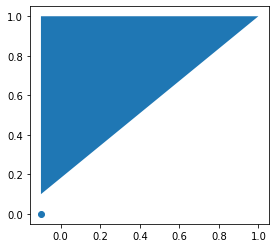

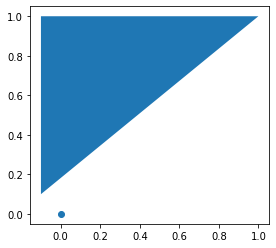

In [12]:
gdf = gpd.GeoDataFrame(
    geometry=[Point(-0.1, 0), Polygon([(-0.1, 0.1), (-0.1, 1), (1, 1)])]
)
validated_gdf = PointValidator().validate(gdf)

ax = gdf.plot()
ax = validated_gdf.plot()

There are several cases where no fix is available or you want to fix them manualy, we can create a validator that warns the users. 

In [13]:
from shapely.geometry.point import Point
from shapely.geometry.polygon import Polygon

from geowrangler.validation import BaseValidator


class PointValidator(BaseValidator):
    validator_column_name = "is_not_point"
    fix_available = False  # Telling the validator that there is no available fixes
    warning_message = "Found geometries that are points below 0"  # warning message
    geometry_types = ["Point"]  # What kind of geometies to validate and fix

    def check(self, geometry):
        # Checks if the geometry is valid. If False, warn the user
        return geometry.x > 0


gdf = gpd.GeoDataFrame(geometry=[Point(-0.1, 0), Polygon([(0, 0.0), (0, 1), (1, 1)])])
validated_gdf = PointValidator().validate(gdf)
validated_gdf

/home/jt/repos/geowrangler/geowrangler/validation.py:107: UserWarning: Found geometries that are points below 0
  warnings.warn(self.warning_message)


,geometry,is_not_point
0,POINT (-0.10000 0.00000),False
1,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....",True
